In [1]:
from google.colab import files
uploaded = files.upload()

Saving SuperStore.xlsx to SuperStore.xlsx


In [3]:
import pandas as pd
df = pd.read_excel('SuperStore.xlsx')
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [9]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

monthly_sales = df.groupby(pd.Grouper(key='Order_Date', freq='M'))['Sales'].sum().reset_index()
monthly_sales.rename(columns={'Order_Date': 'ds', 'Sales': 'y'}, inplace=True)
model = Prophet()
model.fit(monthly_sales)

<ipython-input-9-5ece98d65734>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Order_Date', freq='M'))['Sales'].sum().reset_index()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ox484hz/6_mspb_a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ox484hz/a4vlmkzt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95635', 'data', 'file=/tmp/tmp6ox484hz/6_mspb_a.json', 'init=/tmp/tmp6ox484hz/a4vlmkzt.json', 'output', 'file=/tmp/tmp6ox484hz/prophet_modelkvmgfafd/prophet_model-20250419113229.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:3

In [6]:
future = model.make_future_dataframe(periods=12, freq='M')
future.tail()

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
55,2021-08-31
56,2021-09-30
57,2021-10-31
58,2021-11-30
59,2021-12-31


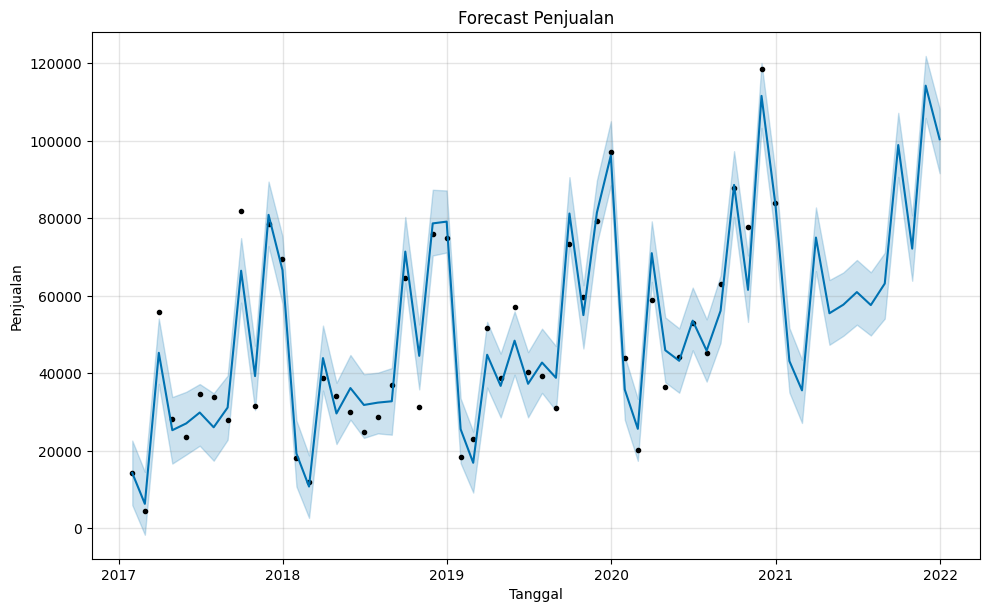

In [10]:
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

model.plot(forecast)
plt.title('Forecast Penjualan')
plt.xlabel('Tanggal')
plt.ylabel('Penjualan')
plt.show()